In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier


In [3]:
# Load the dataset
df = pd.read_csv('Social_Network_Ads.csv')  # Adjust file name if needed
print(df.head())

# Preprocessing
df = df[['Age', 'EstimatedSalary', 'Purchased']]
X = df[['Age', 'EstimatedSalary']]
y = df['Purchased']

# Scale features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.25, random_state=42)


   Age  EstimatedSalary  Purchased
0   19            19000          0
1   35            20000          0
2   26            43000          0
3   27            57000          0
4   19            76000          0


In [5]:
models = {
    "Logistic Regression": LogisticRegression(),
    "KNN": KNeighborsClassifier(),
    "SVM": SVC(),
    "Decision Tree": DecisionTreeClassifier(),
    "Random Forest": RandomForestClassifier()
}

results = []

for name, model in models.items():
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    
    acc = accuracy_score(y_test, y_pred)
    report = classification_report(y_test, y_pred, output_dict=True)
    results.append({
        "Model": name,
        "Accuracy": acc,
        "Precision": report['1']['precision'],
        "Recall": report['1']['recall'],
        "F1-Score": report['1']['f1-score']
    })

# Results DataFrame
results_df = pd.DataFrame(results)
print(results_df.sort_values(by="Accuracy", ascending=False))


                 Model  Accuracy  Precision    Recall  F1-Score
1                  KNN      0.93   0.894737  0.918919  0.906667
2                  SVM      0.93   0.857143  0.972973  0.911392
4        Random Forest      0.91   0.850000  0.918919  0.883117
0  Logistic Regression      0.86   0.925926  0.675676  0.781250
3        Decision Tree      0.83   0.777778  0.756757  0.767123


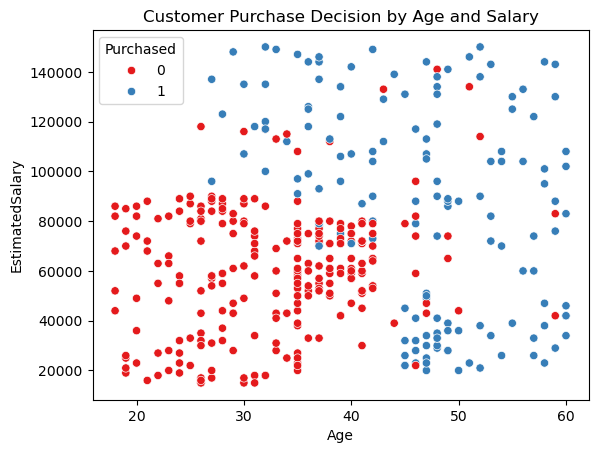

Prediction for Age 30, Salary 87000: Not Purchased
Prediction for Age 40, Salary N/A: Not Purchased
Prediction for Age 40, Salary 100000: Purchased
Prediction for Age 50, Salary N/A: Purchased
Prediction for Age 18, Salary N/A: Not Purchased
Prediction for Age 22, Salary 600000: Purchased
Prediction for Age 35, Salary 2500000: Purchased
Prediction for Age 60, Salary 100000000: Purchased


C:\Users\lenovo\anaconda3\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
C:\Users\lenovo\anaconda3\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
C:\Users\lenovo\anaconda3\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
C:\Users\lenovo\anaconda3\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
C:\Users\lenovo\anaconda3\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
C:\Users\lenovo\anaconda3\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have v

In [7]:
# Fit best model (e.g., Random Forest) on full data
best_model = RandomForestClassifier()
best_model.fit(X_scaled, y)

def predict_customer(age, salary):
    if salary is None:
        salary = df['EstimatedSalary'].min()  # or choose 0
    scaled_input = scaler.transform([[age, salary]])
    prediction = best_model.predict(scaled_input)[0]
    return prediction

# Graphical Visualization
def plot_data():
    sns.scatterplot(data=df, x='Age', y='EstimatedSalary', hue='Purchased', palette='Set1')
    plt.title("Customer Purchase Decision by Age and Salary")
    plt.show()

plot_data()

# Predictions
test_cases = [
    (30, 87000), (40, None), (40, 100000), (50, None),
    (18, None), (22, 600000), (35, 2500000), (60, 100000000)
]

for age, salary in test_cases:
    result = predict_customer(age, salary)
    print(f"Prediction for Age {age}, Salary {salary or 'N/A'}: {'Purchased' if result == 1 else 'Not Purchased'}")


C:\Users\lenovo\anaconda3\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


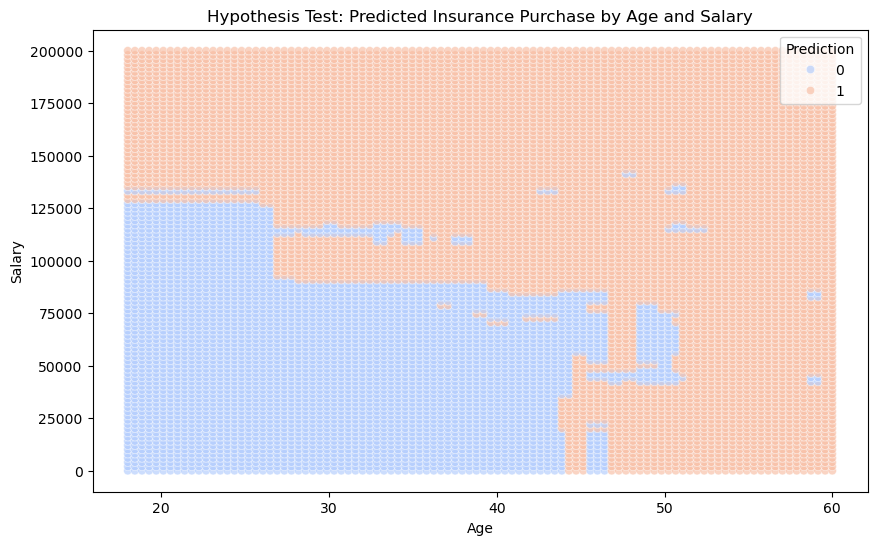

In [9]:
# Create synthetic test grid
ages = np.linspace(18, 60, 100)
salaries = np.linspace(0, 200000, 100)
grid = np.array([[age, sal] for age in ages for sal in salaries])
grid_scaled = scaler.transform(grid)
preds = best_model.predict(grid_scaled)

# Plot heatmap
heat_df = pd.DataFrame(grid, columns=['Age', 'Salary'])
heat_df['Prediction'] = preds

plt.figure(figsize=(10, 6))
sns.scatterplot(data=heat_df, x='Age', y='Salary', hue='Prediction', palette='coolwarm', alpha=0.6)
plt.title("Hypothesis Test: Predicted Insurance Purchase by Age and Salary")
plt.show()


In [11]:
# Summary placeholder
print("✅ Lessons Learned:")
print("- Age and salary together influence the insurance purchase decision.")
print("- High salary doesn't always lead to purchase unless combined with mid-range age.")
print("\n💼 Real-life application scenarios:")
print("1. Targeting new insurance customers through social media marketing based on predicted behavior.")
print("2. Risk profiling for pricing insurance policies or granting loan products.")


✅ Lessons Learned:
- Age and salary together influence the insurance purchase decision.
- High salary doesn't always lead to purchase unless combined with mid-range age.

💼 Real-life application scenarios:
1. Targeting new insurance customers through social media marketing based on predicted behavior.
2. Risk profiling for pricing insurance policies or granting loan products.
